Vorab: conda install gensim

In [21]:
import gensim.downloader

model = gensim.downloader.load('glove-wiki-gigaword-50')

In [22]:
print(model["king"])
print(len(model["king"]))

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
50


In [23]:
# model.key_to_index
len(model.key_to_index)

400000

In [24]:
model.similarity("king", "queen")

0.7839043

In [25]:
model.most_similar("king")

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746229767799377),
 ('emperor', 0.7736246585845947),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542161345481873),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253692626953)]

In [26]:
model.most_similar(model["germany"] - model["france"] + model["paris"])

[('berlin', 0.9181488156318665),
 ('frankfurt', 0.8184096217155457),
 ('munich', 0.8120746612548828),
 ('vienna', 0.8101339936256409),
 ('germany', 0.8048953413963318),
 ('hamburg', 0.797433614730835),
 ('stockholm', 0.7717639803886414),
 ('warsaw', 0.7688193917274475),
 ('budapest', 0.7663007378578186),
 ('prague', 0.7654389142990112)]

In [27]:
# Japan verhält sich zu Sushi wie Deutschland zu?
model.most_similar(model["germany"] - model["japan"] + model["sushi"])

[('gourmet', 0.6915085911750793),
 ('fries', 0.6719846129417419),
 ('sausages', 0.6515130400657654),
 ('hamburger', 0.6382428407669067),
 ('deli', 0.6339925527572632),
 ('braise', 0.6236903071403503),
 ('sushi', 0.6191727519035339),
 ('chef', 0.6177273988723755),
 ('hamburgers', 0.6171662211418152),
 ('burgers', 0.6170258522033691)]

In [28]:
model.most_similar(model["france"] - model["japan"] + model["sushi"])

[('sous', 0.705322802066803),
 ('champagne', 0.6959413886070251),
 ('gourmet', 0.694339394569397),
 ('provence', 0.6751832365989685),
 ('hors', 0.6701313257217407),
 ('comte', 0.6638895869255066),
 ("d'oeuvres", 0.652723491191864),
 ('wine', 0.6512296199798584),
 ('tasting', 0.6478123664855957),
 ('tapas', 0.6295624375343323)]

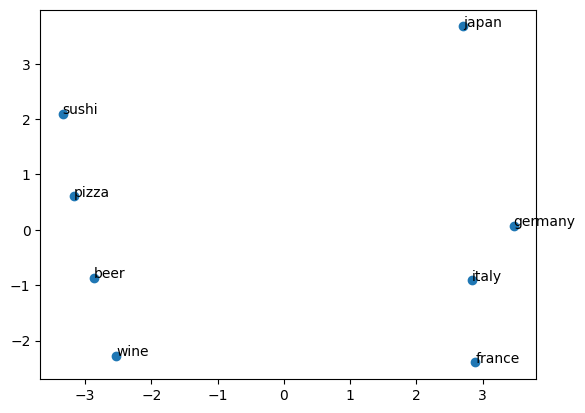

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# words = ["germany", "france", "berlin", "paris", "italy", "rome", "japan", "tokyo",]

words = ["germany", "france", "italy", "japan", "beer", "wine", "pizza", "sushi"]

projections = PCA(n_components=2).fit_transform(model[words])

fig, ax = plt.subplots()
ax.scatter(projections[:, 0], projections[:, 1])
for word, (x,y) in zip(words, projections):
    ax.text(x, y, word)